## Data Preprocessing


In [2]:
import pandas as pd
import numpy as np
import folium
import requests
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [3]:
Latitude = 52.379189
longitude = 4.899431

In [4]:
dataset = pd.read_csv(r"C:\Users\user\Desktop\amsterdam\listings.csv")

In [5]:
dataset.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


Checking how many rows and columns the dataset has and check how many unique values are present for each column.


In [7]:
print('\nRows : ',dataset.shape[0])
print('\nColumns :', dataset.shape[1])
print('\nColumns:',dataset.columns.to_list())
print(' \nUnique:\n',dataset.nunique())


Rows :  8386

Columns : 75

Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availabil

So, we have the 8386 Rows, 75 Columns.


### Plotting the dataset in a map

In [15]:
Lat = 52.379189
Long = 4.899431
locations = list(zip(dataset.latitude, dataset.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

### finding missing values


In [27]:
missing_values = df.isnull().sum()

In [28]:
df = df.dropna()

In [135]:
import geopandas as gpd
df = pd.read_json('neighbourhoods.geojson')



In [30]:
df.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [20]:
import geopandas as gpd
geo_ams = gpd.read_file('neighbourhoods.geojson')

In [22]:
print(f'It has the shape of listing: {dataset.shape}')

It has the shape of listing: (8386, 75)


In [31]:
dataset.isna().sum(axis=0)


id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               830
Length: 75, dtype: int64

In [33]:
dataset.fillna({'reviews_per_month':0},inplace=True)

### Scatter Plot to show the neighbourhood data based on Latitude and Longitude

In [36]:
import seaborn as sns

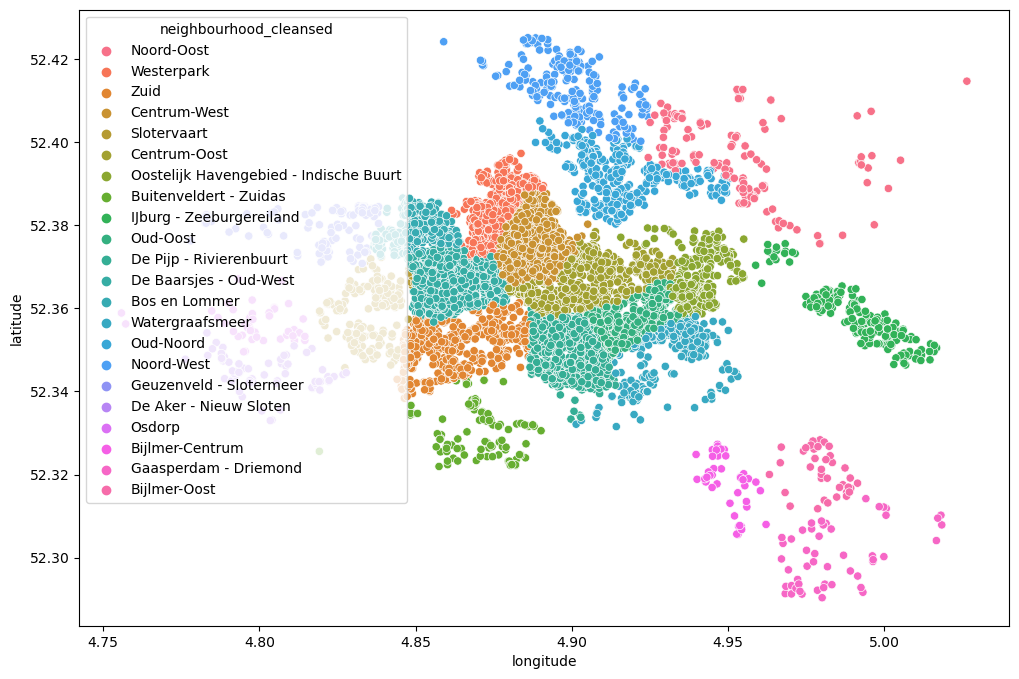

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataset.longitude,y=dataset.latitude,hue=dataset.neighbourhood_cleansed)
plt.show()

### Unique values for room type and neighbourhood.

In [137]:
print('Unique value for room_type are :',dataset.room_type.unique())
print ('Unique value for neighbourhood_group are :',dataset.neighbourhood_cleansed.unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']
Unique value for neighbourhood_group are : ['Noord-Oost' 'Westerpark' 'Zuid' 'Centrum-West' 'Slotervaart'
 'Centrum-Oost' 'Oostelijk Havengebied - Indische Buurt'
 'Buitenveldert - Zuidas' 'IJburg - Zeeburgereiland' 'Oud-Oost'
 'De Pijp - Rivierenbuurt' 'De Baarsjes - Oud-West' 'Bos en Lommer'
 'Watergraafsmeer' 'Oud-Noord' 'Noord-West' 'Geuzenveld - Slotermeer'
 'De Aker - Nieuw Sloten' 'Osdorp' 'Bijlmer-Centrum'
 'Gaasperdam - Driemond' 'Bijlmer-Oost']


### The distribution of the room type 

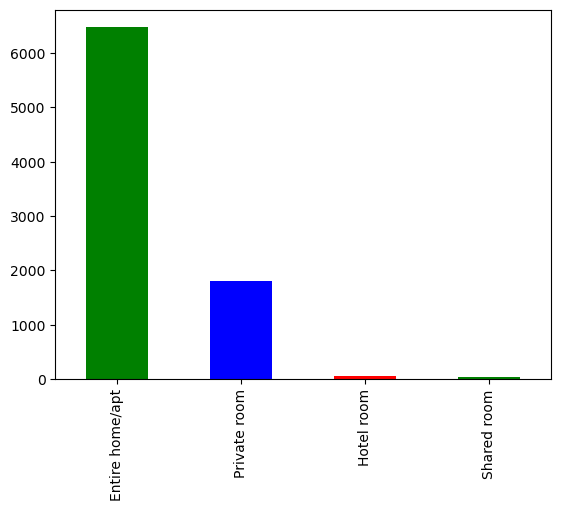

In [44]:
dataset['room_type'].value_counts().plot(kind='bar',color=['g','b','r'])
plt.show()

<Axes: title={'center': 'room type'}, ylabel='neighbourhood_cleansed'>

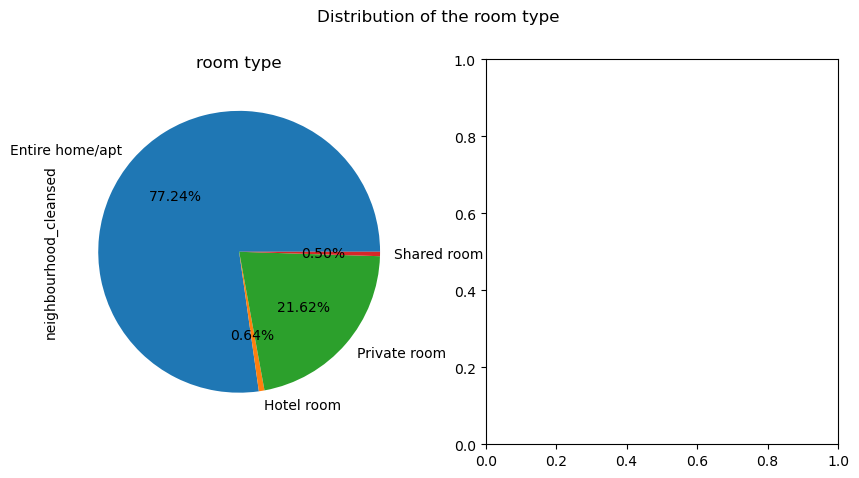

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribution of the room type')
dataset.groupby('room_type')['neighbourhood_cleansed'].count().plot.pie(autopct='%.2f%%', title='room type', ax=ax[0])

### Top 10 Apartment

In [45]:
apt = dataset[dataset['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_cleansed']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood,neighbourhood_cleansed,apartment
3292,241644101,Wittenberg,"Amsterdam, Nord Holland, Netherlands",Centrum-Oost,14
3437,364305280,Arnold,"Amsterdam, Noord-Holland, Netherlands",De Pijp - Rivierenbuurt,14
977,9282300,Dutch Masters,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,9
3446,375961673,Cityden,"Amsterdam, Noord-Holland, Netherlands",Bos en Lommer,9
2303,46691672,Eva & Kobe,"Amsterdam, Noord-Holland, Netherlands",Oud-Noord,6
1951,30890942,Zoku Amsterdam,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,6
3629,495838645,Mario,"Amsterdam, Noord-Holland, Netherlands",Centrum-West,6
3458,395728982,Arnoud,"Amsterdam, Noord-Holland, Netherlands",Geuzenveld - Slotermeer,6
2996,135487531,Rogier & Nicole,"Amsterdam, Noord-Holland, Netherlands",Noord-West,5
3541,460700360,Elias,"Amsterdam, Noord-Holland, Netherlands",Slotervaart,5


In [49]:
Arnoud_data = dataset[dataset['host_name']=='Arnoud']
Arnoud_data_by = Arnoud_data[['host_id','host_name','neighbourhood_cleansed','latitude','longitude']]
Arnoud_data_by.head(5)

,host_id,host_name,neighbourhood_cleansed,latitude,longitude
4621,395728982,Arnoud,Geuzenveld - Slotermeer,52.382441,4.783487
6093,395728982,Arnoud,Geuzenveld - Slotermeer,52.381760,4.783208
6094,395728982,Arnoud,Geuzenveld - Slotermeer,52.381707,4.783272
6277,157530539,Arnoud,Oostelijk Havengebied - Indische Buurt,52.365423,4.932640
6370,33059644,Arnoud,Westerpark,52.372935,4.869539


### Top 10 Private room

In [139]:
private_room = dataset[dataset['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood_cleansed']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood_cleansed,private
414,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,21
1149,273266448,Vlad,De Baarsjes - Oud-West,9
1220,428344496,Catalonia Vondel Amsterdam,De Baarsjes - Oud-West,7
1125,244695471,Heye 130,De Baarsjes - Oud-West,5
1010,128826790,Natasja & Mylan,De Baarsjes - Oud-West,4
1032,143098191,Peter,De Baarsjes - Oud-West,3
1147,269726966,Adam,De Baarsjes - Oud-West,3
1093,203731852,Sweets,De Baarsjes - Oud-West,3
799,55288093,Petra,De Baarsjes - Oud-West,3
1231,439794676,Hedwig En Max,De Baarsjes - Oud-West,3


In [54]:
private_data = dataset[dataset['host_name']=='Hotel Not Hotel']
private_data_by = private_data[['host_id','host_name','neighbourhood_cleansed','latitude','longitude']]
private_data_by.head()

,host_id,host_name,neighbourhood_cleansed,latitude,longitude
506,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36491,4.86102
508,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36714,4.86019
518,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36623,4.85891
519,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36689,4.85891
520,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36568,4.85883


In [55]:
private = dataset[dataset['room_type']=='Shared room']
list_private = private.groupby(['host_id','host_name','neighbourhood_cleansed']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood_cleansed,shared
12,245267147,ClinkNOORD,Oud-Noord,8
10,237150996,St Christophers At The Winston,Centrum-West,4
19,372015241,Ecomama,Centrum-Oost,3
13,251479377,Generator,Oud-Oost,3
18,342059962,David,Geuzenveld - Slotermeer,2
8,198405490,Suzanne,Centrum-West,2
11,243878598,Bunk,Oud-Noord,2
15,308694260,Dutchies Hostel,Bos en Lommer,2
14,251983944,Marija,Centrum-Oost,1
22,438232457,Kaan,Centrum-Oost,1


### Data distirbution for neighbourhood (location)


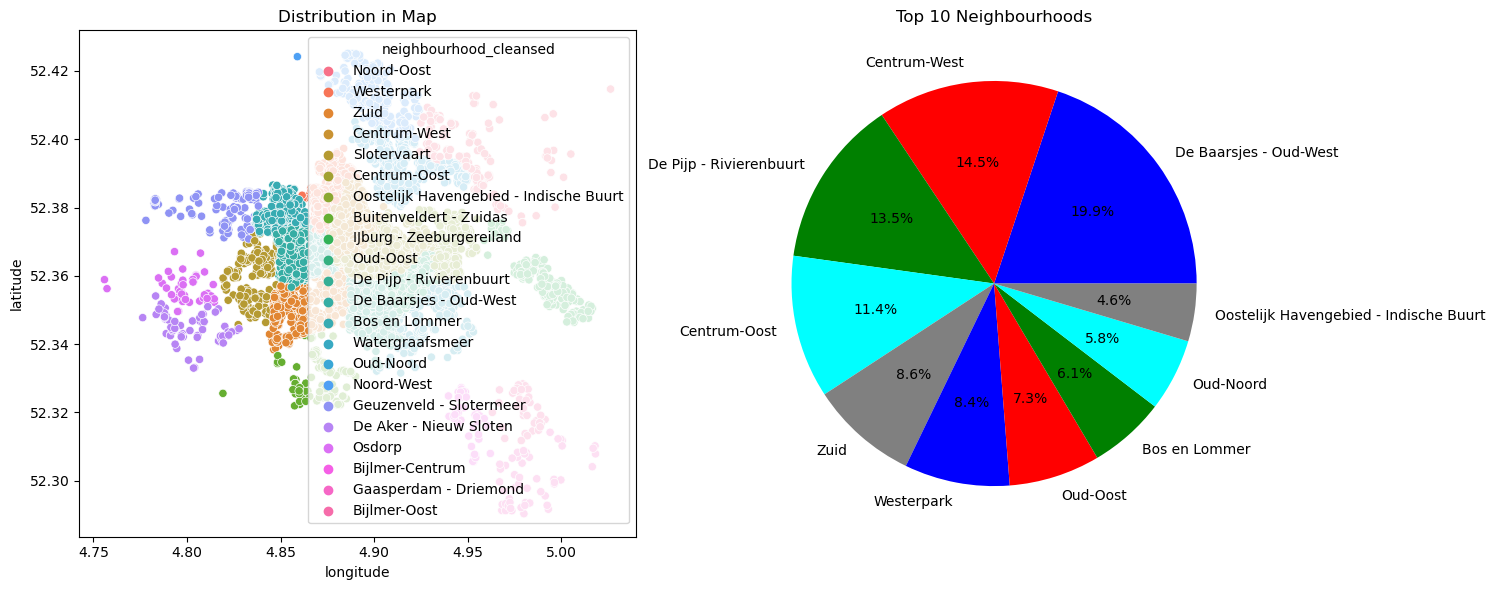

In [155]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.scatterplot(x=dataset['longitude'], y=dataset['latitude'], hue=dataset['neighbourhood_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
numbers = dataset['neighbourhood_cleansed'].value_counts()[:10]
ax2.pie(numbers.values, labels=numbers.index, autopct='%1.1f%%', colors=['b', 'r', 'g', 'cyan', 'gray'])
ax2.set_title('Top 10 Neighbourhoods')

plt.tight_layout()
plt.show()


### Data distirbution for neighbourhood (location)

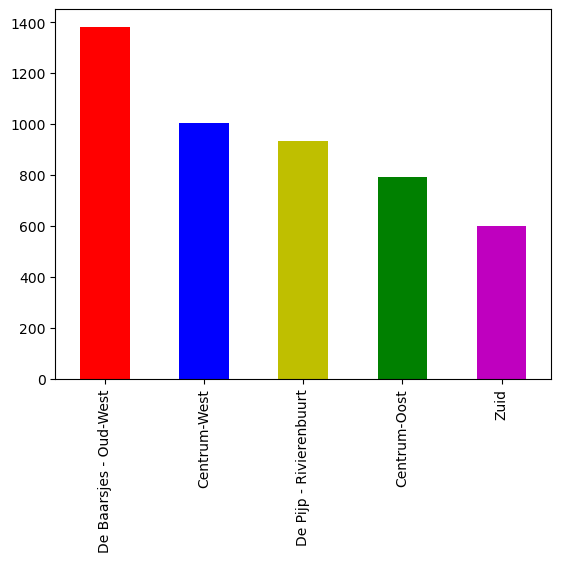

In [65]:
dataset['neighbourhood_cleansed'].value_counts().nlargest(5).plot(kind='bar', color=['r', 'b', 'y', 'g', 'm'])
plt.show()

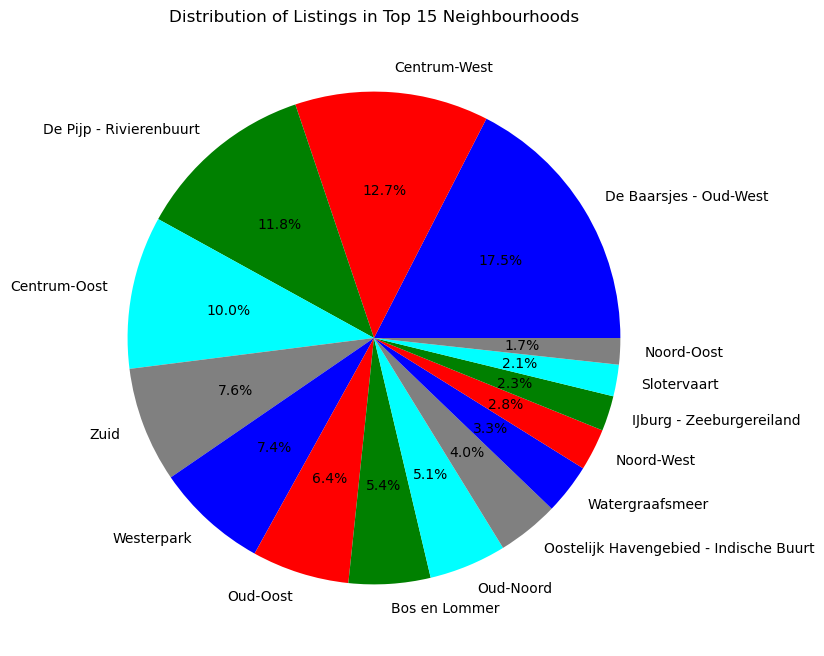

In [145]:
plt.figure(figsize=(8,8))

top_15_neighborhoods = dataset['neighbourhood_cleansed'].value_counts().nlargest(15)
plt.pie(top_15_neighborhoods.values, labels=top_15_neighborhoods.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Distribution of Listings in Top 15 Neighbourhoods')

plt.show()


In [66]:
private = dataset[dataset['neighbourhood_cleansed']=='De Baarsjes - Oud-West']
list_private = private.groupby(['host_id','host_name','neighbourhood','neighbourhood_cleansed']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood,neighbourhood_cleansed,count
278,14574533,Hotel Not Hotel,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,11
279,14574533,Hotel Not Hotel,"Amsterdam, North Holland, Netherlands",De Baarsjes - Oud-West,8
724,273266448,Vlad,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,8
761,428344496,Catalonia Vondel Amsterdam,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,7
634,128826790,Natasja & Mylan,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,4
514,55288093,Petra,"Amsterdam, North Holland, Netherlands",De Baarsjes - Oud-West,3
650,143098191,Peter,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,3
744,363404652,Conscious Hotel The Tire Station,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,3
567,76572471,Glendon,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,3
710,244695471,Heye 130,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,3


In [79]:
dataset.isna().sum(axis=0)

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

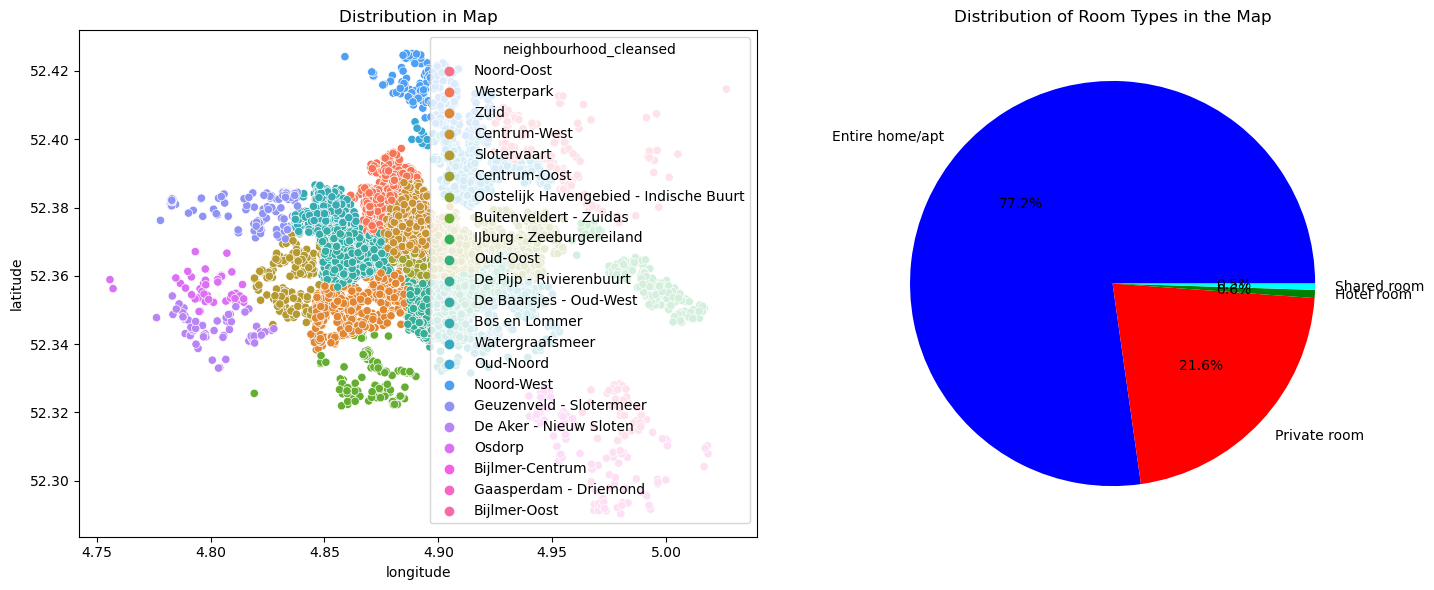

In [157]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.scatterplot(x=dataset['longitude'], y=dataset['latitude'], hue=dataset['neighbourhood_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
numbers = dataset['room_type'].value_counts()[:15]
ax2.pie(numbers.values, labels=numbers.index, autopct='%1.1f%%', colors=['b', 'r', 'g', 'cyan', 'gray'])
ax2.set_title('Distribution of Room Types in the Map')

plt.tight_layout()
plt.show()



### Price analyzing 

In [80]:
dataset.price.isna().sum()

0

In [86]:
dataset['price'].describe()

count       8386
unique       631
top       200.00
freq         318
Name: price, dtype: object

In [100]:
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

<Axes: xlabel='price'>

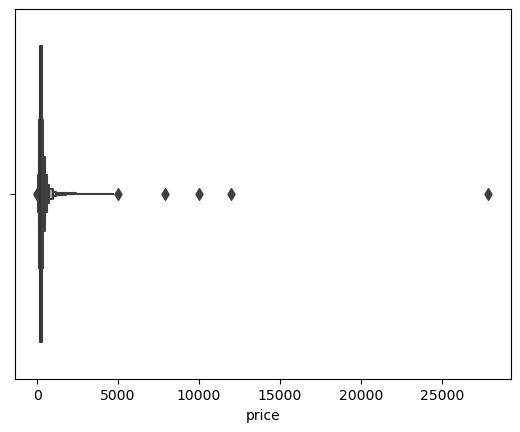

In [102]:
figsize=(12,8)
sns.boxenplot(x='price',data=dataset)

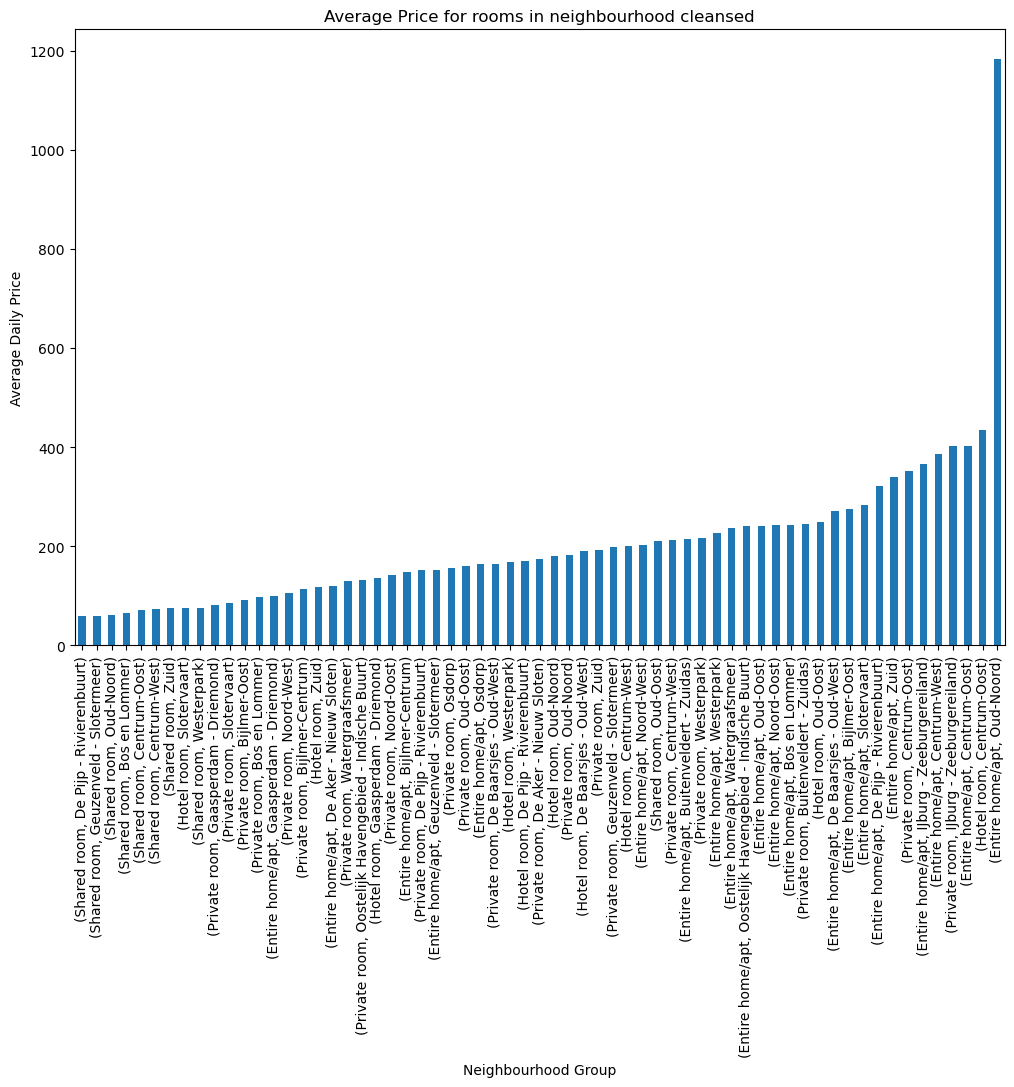

List of Average Price per night based on the neighbourhood cleansed


price
room_type       neighbourhood_cleansed              
Entire home/apt Oud-Noord                1183.757576
                Buitenveldert - Zuidas    213.733333
                Osdorp                    164.000000
                Westerpark                226.955556
                Geuzenveld - Slotermeer   151.357143
...                                              ...
Shared room     Centrum-Oost               72.000000
                Bos en Lommer              66.000000
                Oud-Noord                  62.100000
                Geuzenveld - Slotermeer    59.500000
                De Pijp - Rivierenbuurt    59.000000

[63 rows x 1 columns]

In [103]:
dataset.head()
plt.figure(figsize=(12,8))
df = dataset[dataset['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood cleansed')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood cleansed')
pd.DataFrame(df1).sort_values(by='room_type')

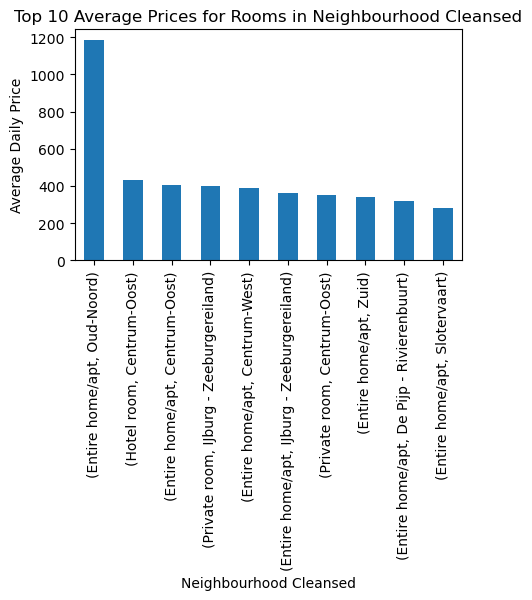

List of Top 10 Average Prices per Night Based on the Neighbourhood Cleansed


price
room_type       neighbourhood_cleansed               
Entire home/apt Oud-Noord                 1183.757576
                Centrum-Oost               402.987179
                Centrum-West               387.095238
                IJburg - Zeeburgereiland   365.000000
                Zuid                       340.604167
                De Pijp - Rivierenbuurt    321.263158
                Slotervaart                283.615385
Hotel room      Centrum-Oost               434.500000
Private room    IJburg - Zeeburgereiland   402.300000
                Centrum-Oost               350.893617

In [108]:
dataset.head()

plt.figure(figsize=(5,3))
df = dataset[dataset['minimum_nights'] == 1]
df1 = df.groupby(['room_type', 'neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True).nlargest(10)
df1.plot(kind='bar')
plt.title('Top 10 Average Prices for Rooms in Neighbourhood Cleansed')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Cleansed')
plt.show()

print('List of Top 10 Average Prices per Night Based on the Neighbourhood Cleansed')
pd.DataFrame(df1).sort_values(by='room_type')


Top 10 most expensive locality in Airbnb_Amsterdam listing are :


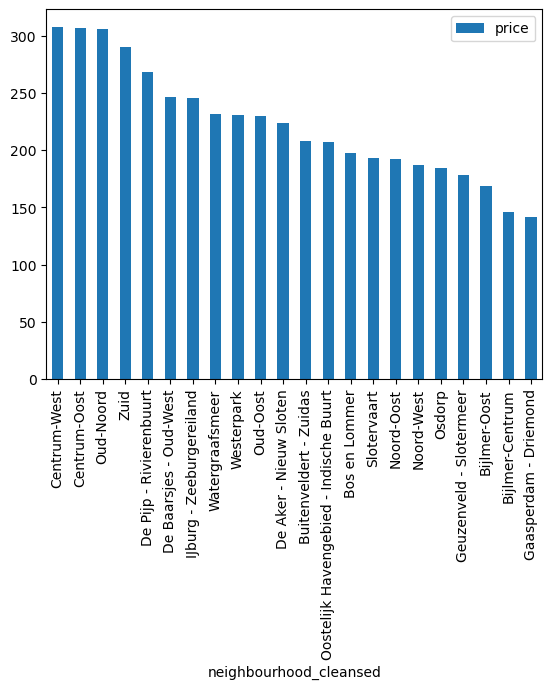

,price
neighbourhood_cleansed,
Centrum-West,307.746521
Centrum-Oost,306.925599
Oud-Noord,305.982587
Zuid,290.227045
De Pijp - Rivierenbuurt,268.487701
De Baarsjes - Oud-West,246.507959
IJburg - Zeeburgereiland,245.677596
Watergraafsmeer,231.942748
Westerpark,231.142123


In [115]:
print('Top 10 most expensive locality in Airbnb_Amsterdam listing are :')
df4 = dataset.dropna(subset=["price"]).groupby("neighbourhood_cleansed")[["neighbourhood_cleansed", "price"]].agg("mean", numeric_only=True).sort_values(by="price", ascending=False)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)


Top 15 cheapest localities in Airbnb_Amsterdam listings are:
neighbourhood_cleansed
Gaasperdam - Driemond                     141.274510
Bijlmer-Centrum                           146.361702
Bijlmer-Oost                              168.794872
Geuzenveld - Slotermeer                   178.603448
Osdorp                                    184.204545
Noord-West                                186.729358
Noord-Oost                                192.094891
Slotervaart                               192.926829
Bos en Lommer                             197.915094
Oostelijk Havengebied - Indische Buurt    207.106250
Buitenveldert - Zuidas                    208.270000
De Aker - Nieuw Sloten                    223.972973
Oud-Oost                                  229.537549
Westerpark                                231.142123
Watergraafsmeer                           231.942748
Name: price, dtype: float64


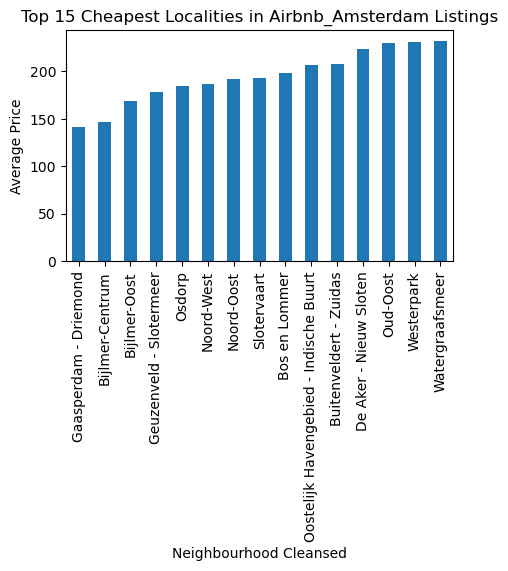

In [119]:
print('\nTop 15 cheapest localities in Airbnb_Amsterdam listings are:')
top_10_cheapest = dataset.groupby("neighbourhood_cleansed")["price"].mean().nsmallest(15)
print(top_10_cheapest)

top_10_cheapest.plot(kind='bar', figsize=(5, 3))
plt.title('Top 15 Cheapest Localities in Airbnb_Amsterdam Listings')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Cleansed')
plt.show()

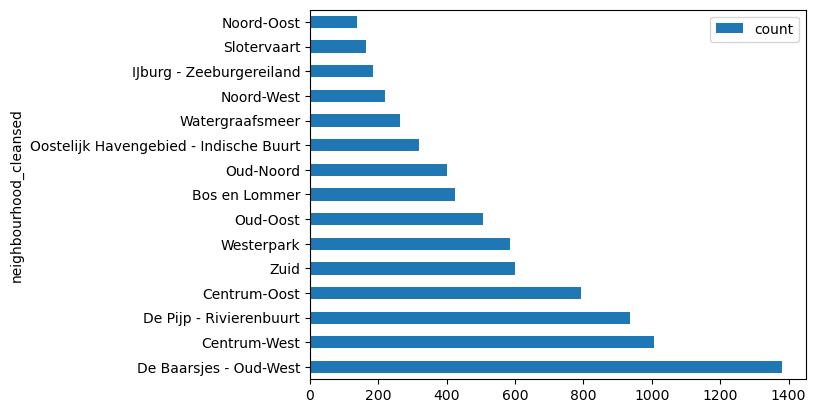

,count
neighbourhood_cleansed,
De Baarsjes - Oud-West,1382
Centrum-West,1006
De Pijp - Rivierenbuurt,935
Centrum-Oost,793
Zuid,599
Westerpark,584
Oud-Oost,506
Bos en Lommer,424
Oud-Noord,402


In [118]:
df5 = dataset.groupby('neighbourhood_cleansed')[['neighbourhood_cleansed','host_name']].agg(['count'])['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(15))

Least Listing number of count


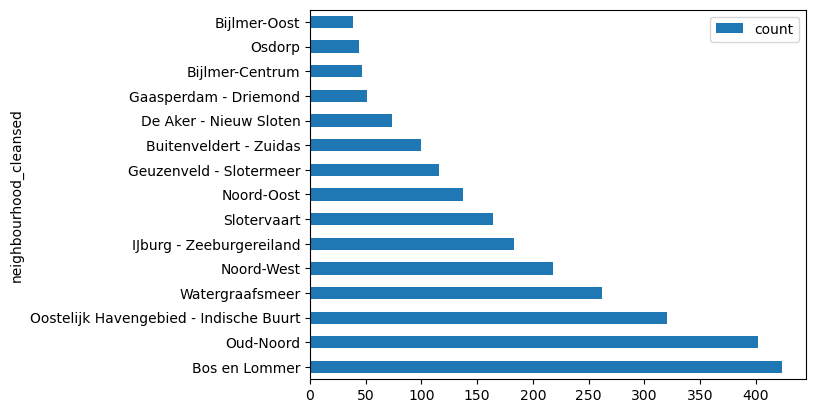

,count
neighbourhood_cleansed,
Bos en Lommer,424
Oud-Noord,402
Oostelijk Havengebied - Indische Buurt,320
Watergraafsmeer,262
Noord-West,218
IJburg - Zeeburgereiland,183
Slotervaart,164
Noord-Oost,137
Geuzenveld - Slotermeer,116


In [120]:
print('Least Listing number of count')
df5 = dataset.groupby('neighbourhood_cleansed')[['neighbourhood_cleansed','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

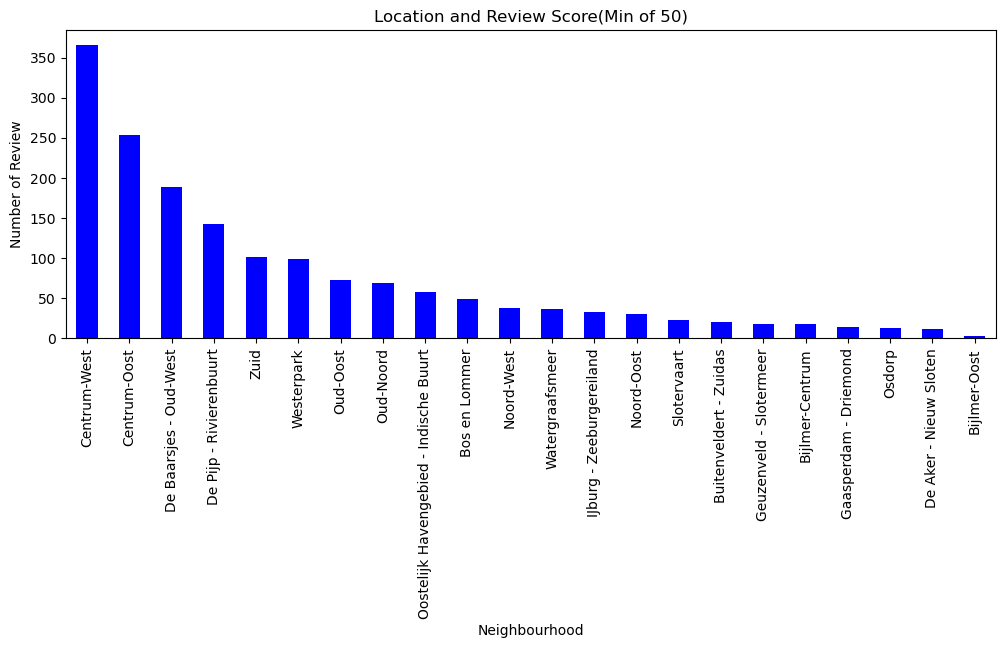

 Count of Review v/s neighbourhood


,neighbourhood_cleansed
Centrum-West,366
Centrum-Oost,253
De Baarsjes - Oud-West,188
De Pijp - Rivierenbuurt,142
Zuid,101
Westerpark,99
Oud-Oost,72
Oud-Noord,69
Oostelijk Havengebied - Indische Buurt,58
Bos en Lommer,49


In [148]:
fig = plt.figure(figsize=(12,4))
review_50 = dataset[dataset['number_of_reviews']>=50]
df2 = review_50['neighbourhood_cleansed'].value_counts()
df2.plot(kind='bar',color=['b'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood')
plt.show()
print(' Count of Review v/s neighbourhood')
pd.DataFrame(df2)

In [140]:
map1=folium.Map([52.379189,4.899431],zoom_start=9.8)
location = ['latitude','longitude']
df = review_50[location]
HeatMap(df.dropna(),radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'yellow'}).add_to(map1)
map1

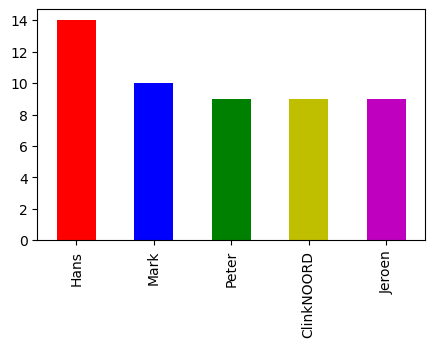

In [129]:
plt.figure(figsize=(5,3))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])

<Axes: xlabel='availability_365', ylabel='price'>

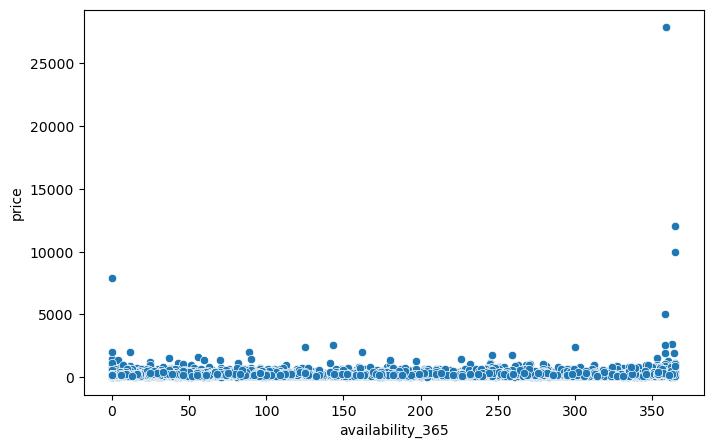

In [141]:
plt.figure(figsize=(8,5))
sns.scatterplot(y=dataset['price'],x=dataset['availability_365'])

<Axes: xlabel='availability_60', ylabel='price'>

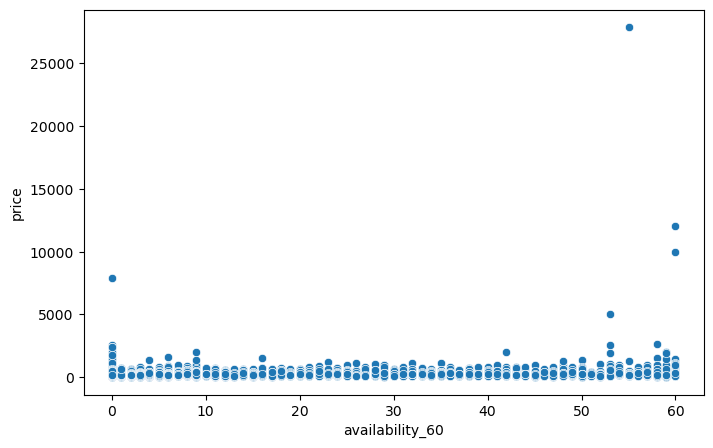

In [142]:
plt.figure(figsize=(8,5))
sns.scatterplot(y=dataset['price'],x=dataset['availability_60'])

In [133]:
df6 = review_50.groupby(['neighbourhood_cleansed','room_type']).mean(numeric_only=True)
df6 = df6.drop(['id','calculated_host_listings_count','reviews_per_month'],axis=1)
pd.DataFrame(df6).sort_values('neighbourhood_cleansed')

scrape_id  \
neighbourhood_cleansed                 room_type                       
Bijlmer-Centrum                        Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Bijlmer-Oost                           Private room     2.023090e+13   
Bos en Lommer                          Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
                                       Shared room      2.023090e+13   
Buitenveldert - Zuidas                 Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Centrum-Oost                           Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
                                       Shared room      2.023090e+13   
Centrum-West                           Shared room      2.023090e+13   
                                       Private room     2.023090e+13   
                                       Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
De Aker - Nieuw Sloten                 Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
De Baarsjes - Oud-West                 Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
De Pijp - Rivierenbuurt                Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Gaasperdam - Driemond                  Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Geuzenveld - Slotermeer                Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
IJburg - Zeeburgereiland               Private room     2.023090e+13   
                                       Entire home/apt  2.023090e+13   
Noord-Oost                             Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Noord-West                             Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Oostelijk Havengebied - Indische Buurt Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Osdorp                                 Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Oud-Noord                              Shared room      2.023090e+13   
                                       Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Oud-Oost                               Shared room      2.023090e+13   
                                       Private room     2.023090e+13   
                                       Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
Slotervaart                            Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Watergraafsmeer                        Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Westerpark                             Shared room      2.023090e+13   
                                       Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Zuid                       

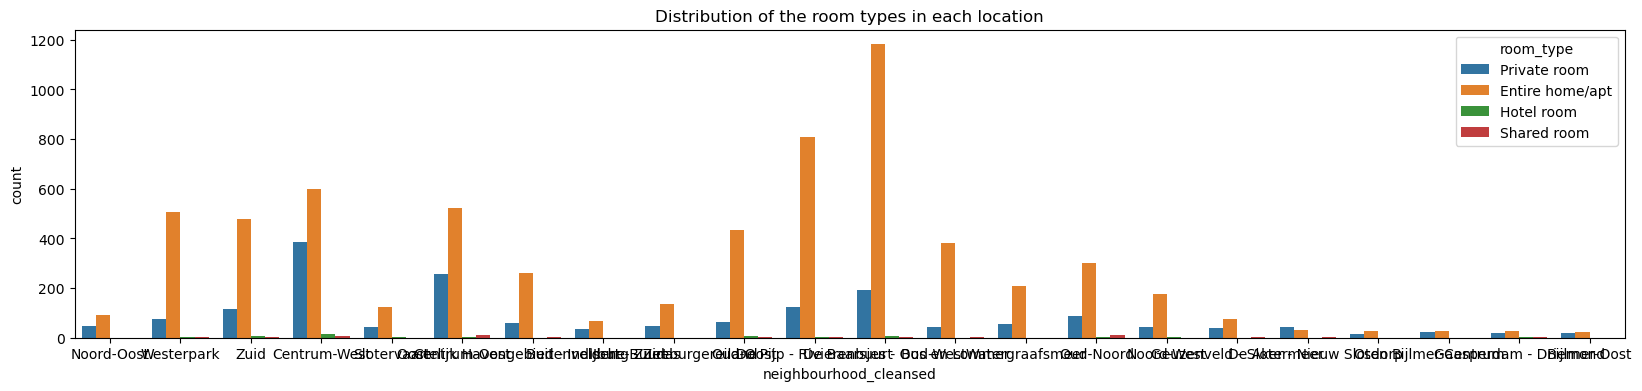

In [162]:
plt.figure(figsize=(20,4))
sns.countplot(x=dataset['neighbourhood_cleansed'], hue=dataset['room_type'])
plt.title('Distribution of the room types in each location')
plt.show()

### Price distribution


In [48]:
import geopandas as gpd
target_crs = 'EPSG:7080'

geo_ams = geo_ams.to_crs(target_crs)

geo_ams["longitude"] = geo_ams.centroid.x
geo_ams["latitude"] = geo_ams.centroid.y

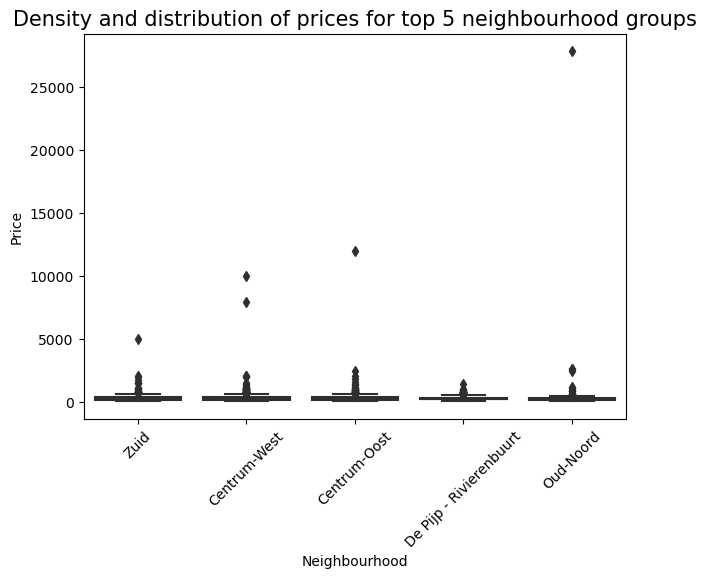

In [177]:
top_neighborhoods = dataset.groupby('neighbourhood_cleansed')['price'].mean().nlargest(5).index
top_neighborhood_data = dataset[dataset['neighbourhood_cleansed'].isin(top_neighborhoods)]

plt.figure(figsize=(7,5))
sns.boxplot(data=top_neighborhood_data, x='neighbourhood_cleansed', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for top 5 neighbourhood groups', fontsize=15)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.show()


It can be seen that mean of prices in Zuid are higher than the rest. Then, we will find out which room is the most expensive and which room type is the cheapest.

Text(0, 0.5, 'Price')

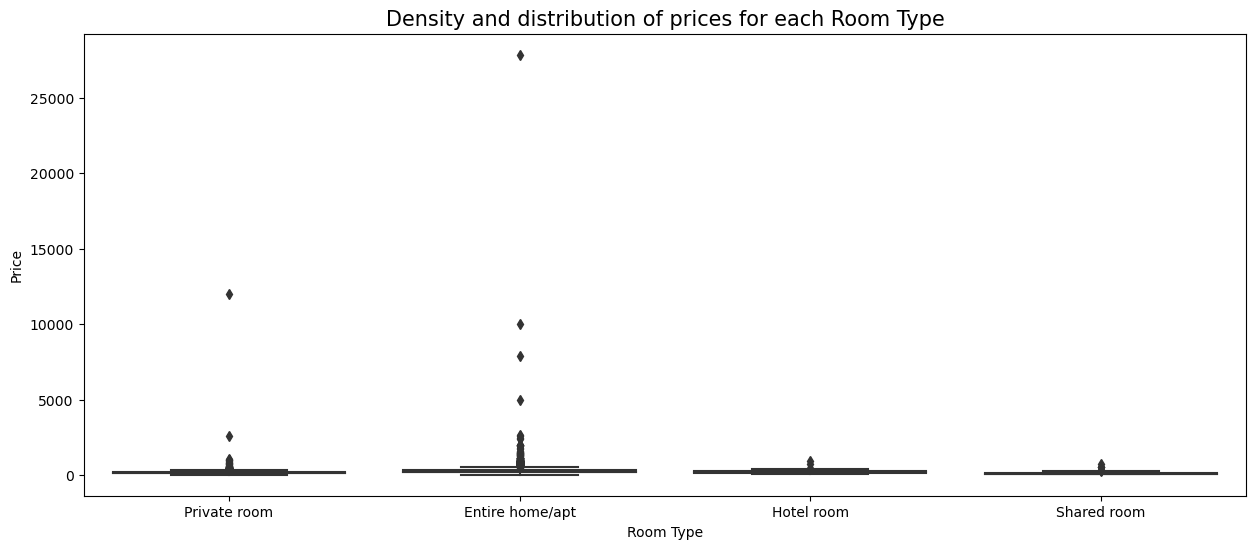

In [181]:
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset, x='room_type', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each Room Type', fontsize=15)
plt.xlabel('Room Type')
plt.ylabel("Price")

In [179]:
plt.figure(figsize=(15,6))
sns.boxplot(dataset=dataset, x='room_type', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each Room Type', fontsize=15)
plt.xlabel('Room Type')
plt.ylabel('Price')


ValueError: Could not interpret input 'room_type'

<Figure size 1500x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

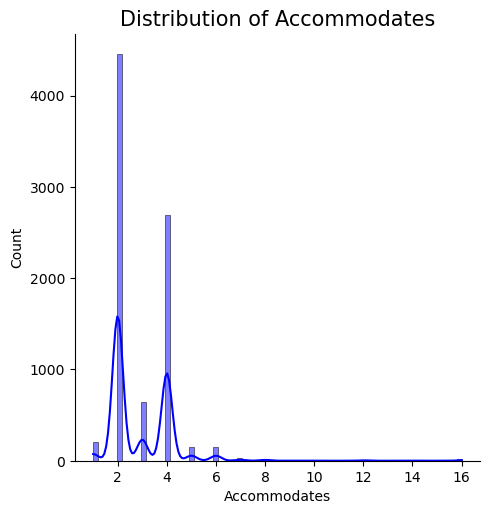

In [183]:
plt.figure(figsize=(10, 6))
sns.displot(dataset['accommodates'], kde=True, color='blue')
plt.title('Distribution of Accommodates', fontsize=15)
plt.xlabel('Accommodates')
plt.show()


Mostly houses are 2 accommodates


### Distribution of the Price


<Figure size 1000x600 with 0 Axes>

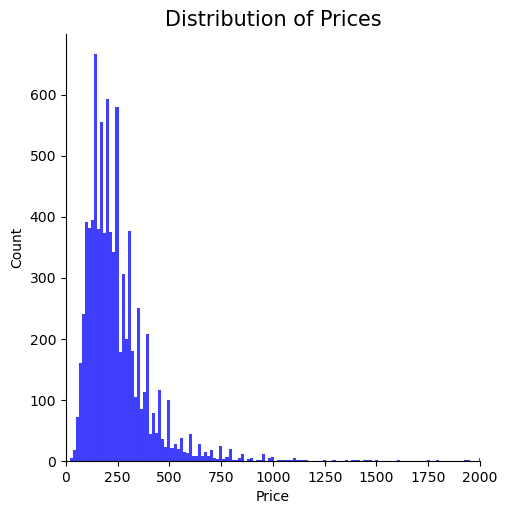

In [189]:
plt.figure(figsize=(10, 6))
sns.displot(dataset['price'], kde=False, color='blue')
plt.title('Distribution of Prices', fontsize=15)
plt.xlabel('Price')
plt.xlim(0, 2000)
plt.show()



It can be seen that prices are mostly around between 100 and 300 dollars. Price data is right skewed. Let's plot the Price Distribution in Logarithm to see what happens

<Figure size 600x600 with 0 Axes>

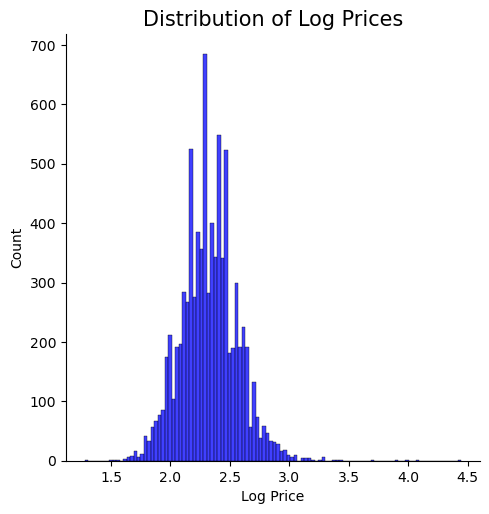

In [194]:
plt.figure(figsize=(6, 6))
sns.displot(dataset['log_price'], kde=False, color='blue')
plt.title('Distribution of Log Prices', fontsize=15)
plt.xlabel('Log Price')
plt.show()


When we plot the price in logarithmic case, the distribution likes the normal distribution. The skewed data turned to like a normal distribution.

Most Expensive and The Cheapest Neighbourhoods

In [195]:
a = dataset.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True).head(20)
d = dataset.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(20)

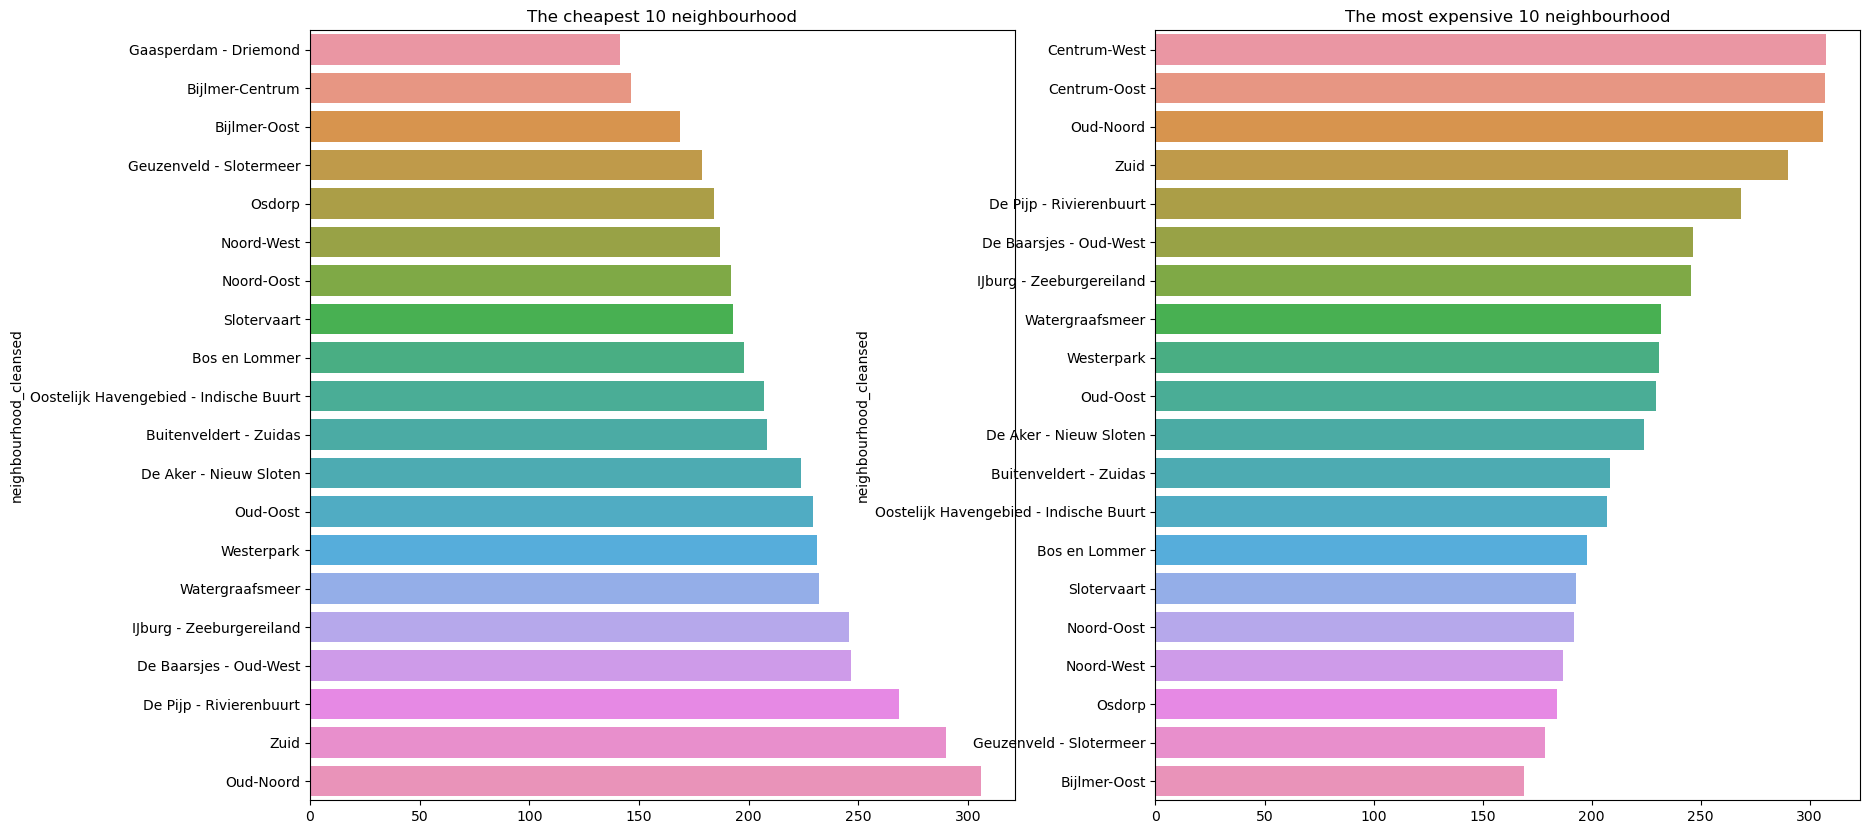

In [197]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('The cheapest 10 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2)
ax2.set_title('The most expensive 10 neighbourhood')
plt.show()

Distribution of the Reviews

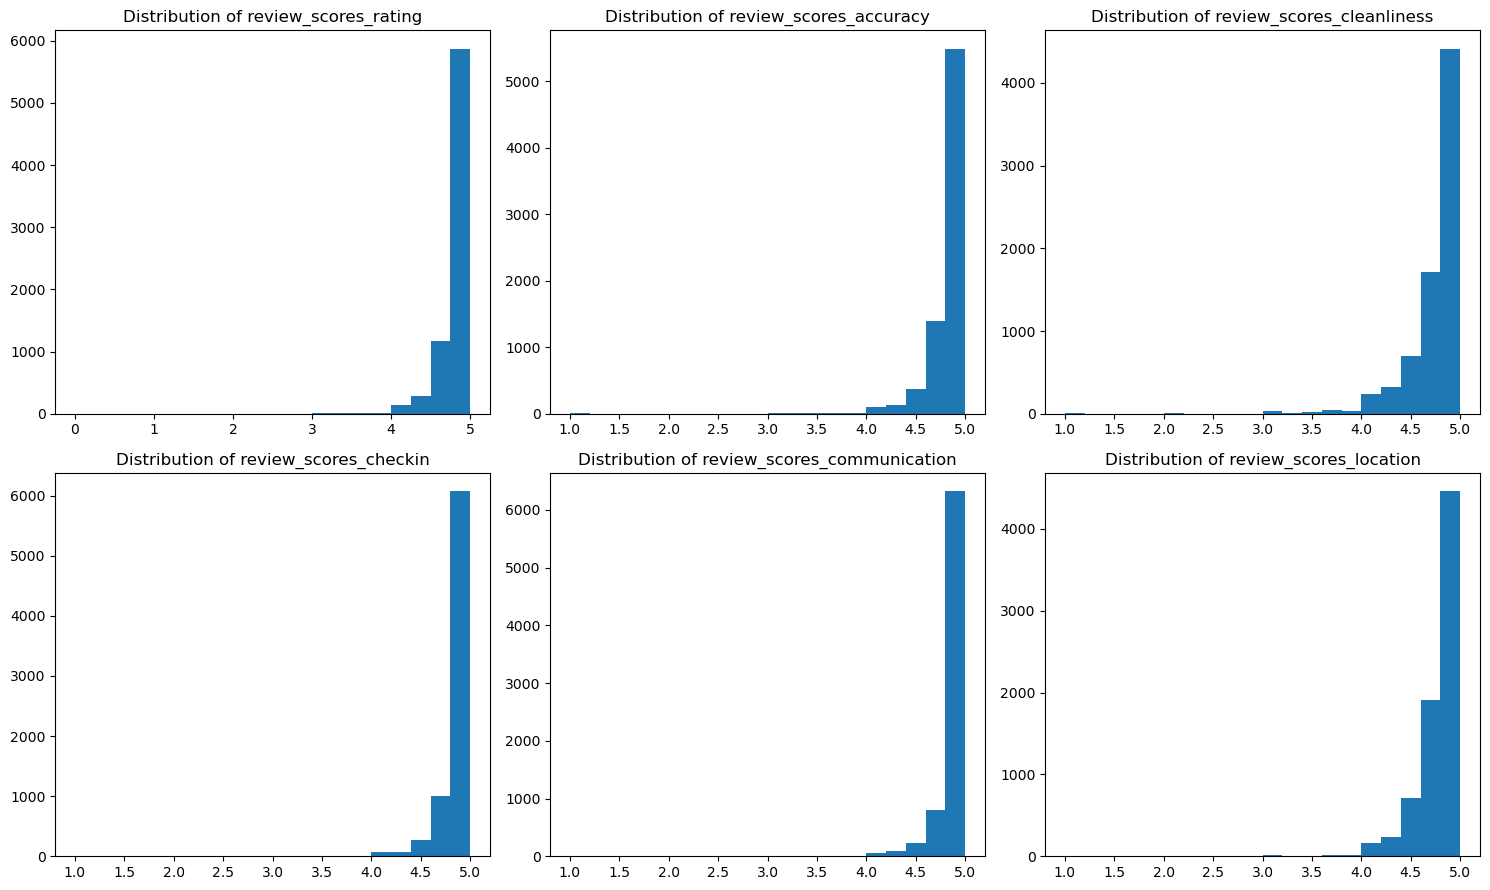

In [201]:
reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
for ax, name in zip(axes.flatten(), reviews):
    ax.hist(dataset[name], bins=20)
    ax.set_title(f"Distribution of {name}")

plt.tight_layout()
plt.show()


Reviews Scores are mostly around 4 - 5. Since the most of the houses review scores are high, it might not be a good feature for price prediction. But that is just an assumption. We will see if there is a correlation between review scores and the price after a few cells.

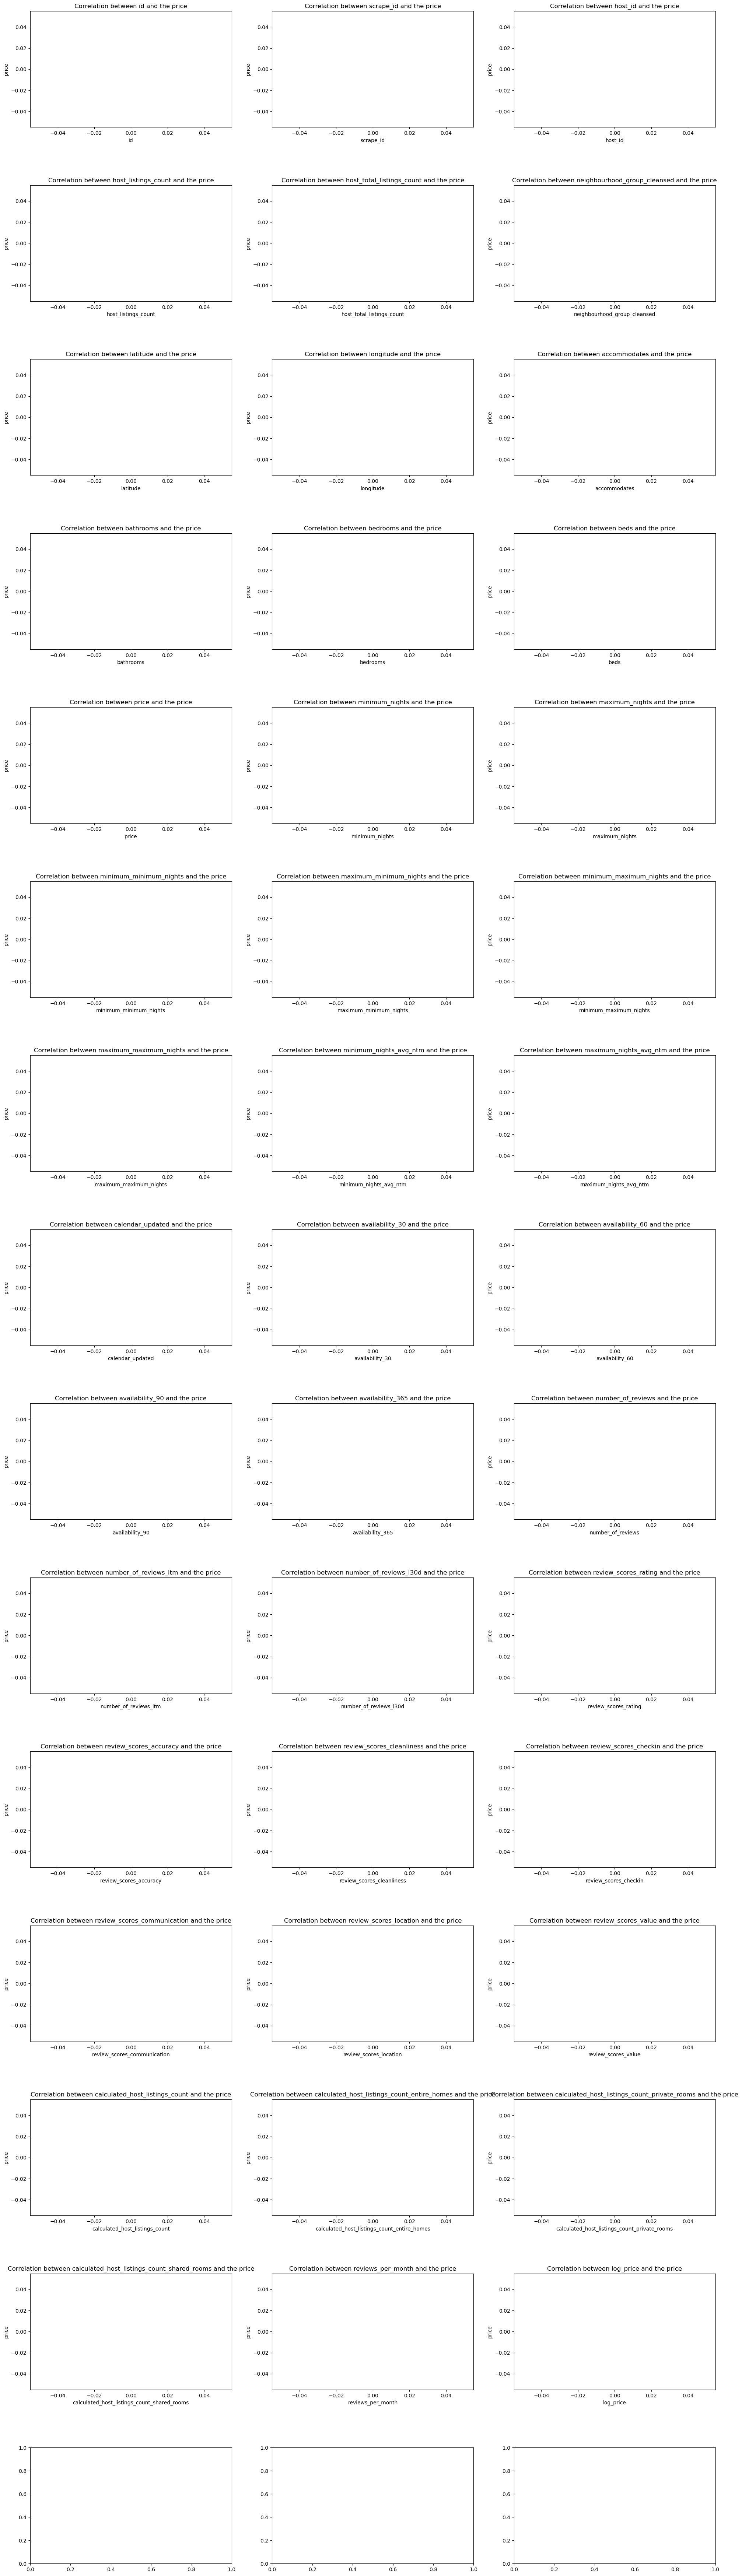

In [230]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = dataset.select_dtypes(include=numerics)
nrows = int(len(newdf.columns) / 3) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(24, 6*nrows))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), newdf.columns):
  
  sns.regplot(x=name, y='price', data=newdf, ax=ax)
  ax.set_title(f"Correlation between {name} and the price")

plt.show()

<Axes: >

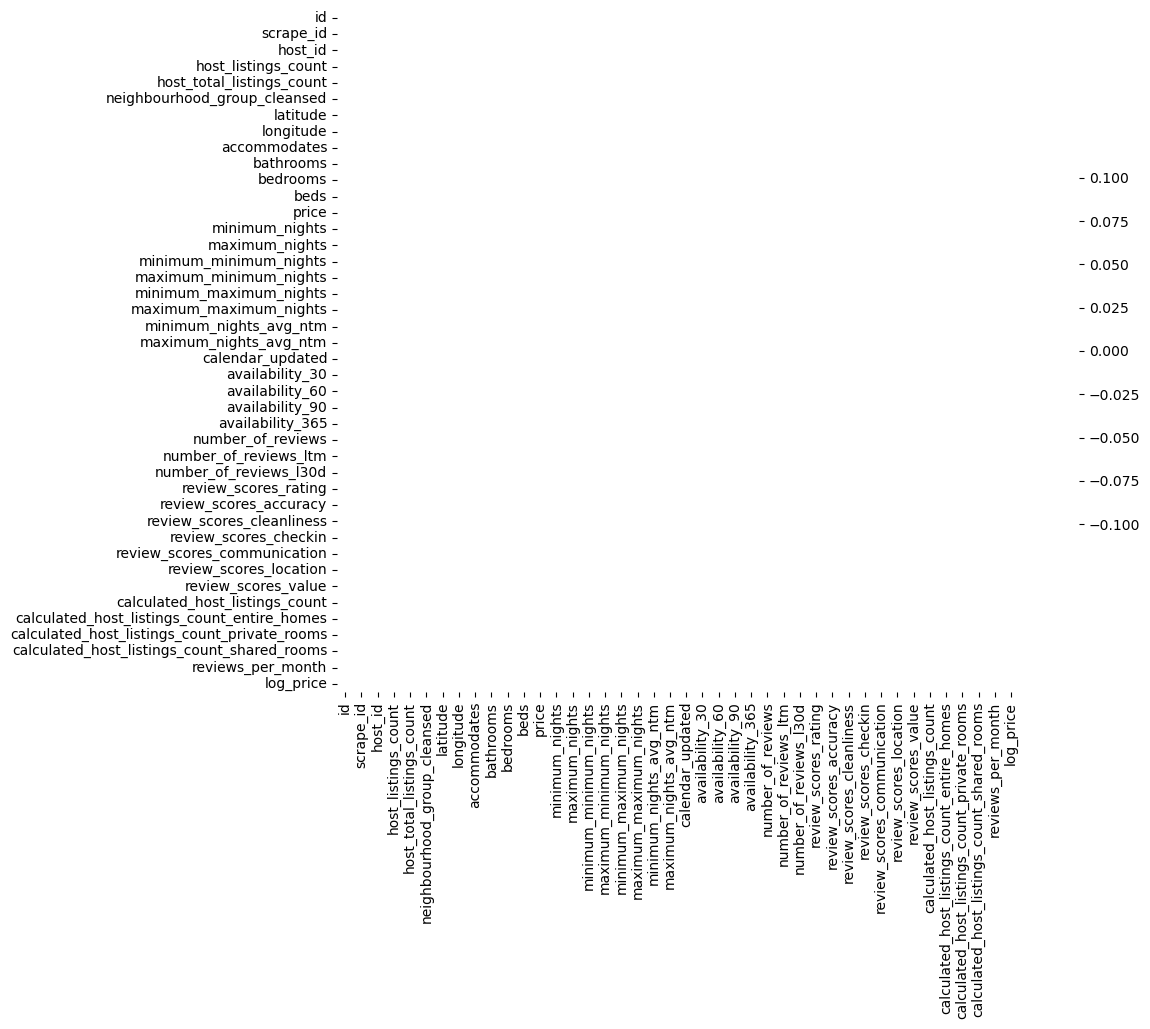

In [232]:
corr = dataset.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ML 

In [253]:
dataset = dataset[dataset.price > 0]
data.columns

Index(['neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'log_price'],
      dtype='object')

In [254]:
dataset.dtypes

neighbourhood                   float64
neighbourhood_cleansed          float64
neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
property_type                   float64
room_type                       float64
accommodates                      int64
bathrooms                       float64
bathrooms_text                  float64
bedrooms                        float64
beds                            float64
amenities                       float64
price                           float64
minimum_nights                    int64
maximum_nights                    int64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
log_price                       float64
dtype: object

In [257]:
dataset = dataset.reset_index(drop=True)

dataset.head()

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,log_price


In [258]:
data.drop(columns=['log_price'], inplace=True)

KeyError: "['log_price'] not found in axis"

In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"There are {X_train.shape[0]} traning data")
print(f"There are {X_test.shape[0]} test data")


X.head()

ValueError: Found array with 0 sample(s) (shape=(0, 22)) while a minimum of 1 is required by StandardScaler.